In [3]:
#General:
import tweepy       #To consume twitter's API
import numpy as np  #TO HANDLE DATA
import pandas as pd #To number computing

#for plotting and visualization
from IPython.display import display
#import seaborn as sns
%matplotlib inline


In [6]:
import matplotlib.pyplot as plt

In [8]:
#Twitter app access keys for @user
#consume
CONSUMER_KEY = 'QbrqL6ojrIIiqIJLj6gV2v6I2'
CONSUMER_SECRET = 'YLe3LTUFh6dXtvQaArrK8OBNG49JT8xNVwZUwbMHwU3N8ALKG2'

#Access
ACCESS_TOKEN = '1515145326-qgPTVDWtkV09oOnI65GiKZfDPsv6A7FZA68JVho'
ACCESS_SECRET = 'fYALlob27muHM2dyWalr0hQWMQnoS0xDEhLToDcRKYVbD'

In [10]:
#API setup
def twitter_setup():
    """
    utility function to setup Twitter's API
    with our Access key's provided
    """
    #Authentication and access using keys
    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    #Return API with Authentication
    api = tweepy.API(auth)
    return api

In [12]:
#we create an Extractor object

extractor = twitter_setup()

#we create a tweet list as follows
tweets = extractor.user_timeline(screen_name = "@narendramodi", count = 200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

#we print the most recent 5 tweets:
print("5 Recent Tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 Recent Tweets:

Addressing Indian and Korean businesspersons in Seoul. Watch. https://t.co/d2HH7L0nnU

Subjects relating to world peace, security, the need to fight terrorism figured during the talks with HRH Mohammed Bin Salman.

HRH Mohammed Bin Salman and I discussed aspects relating to closer investment ties between our nations. We also had… https://t.co/z4a8cStvFt

Held extensive talks with HRH Mohammed Bin Salman, the Crown Prince of Saudi Arabia. 

India’s ties with Saudi Arab… https://t.co/fWnCGIVfmX

During our talks, President @moonriver365 and I will take forward our conversations from last year on how best to a… https://t.co/r6BbFKz4AY



In [13]:
#we create a pandas dataframe as follows:

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

#we dispplay the first 10 elements of the dataframe
display(data.head(10))

,Tweets
0,Addressing Indian and Korean businesspersons i...
1,"Subjects relating to world peace, security, th..."
2,HRH Mohammed Bin Salman and I discussed aspect...
3,Held extensive talks with HRH Mohammed Bin Sal...
4,"During our talks, President @moonriver365 and ..."
5,"As fellow democracies, India and ROK have shar..."
6,"This evening, I will be leaving for the Republ..."
7,Addressing the media after talks with HRH Moha...
8,हिन्दी साहित्य के शिखर पुरुष नामवर सिंह जी के ...
9,Best wishes on Mizoram Statehood Day. \n\nThe ...


In [14]:
#internal methods of a single twwet object
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [16]:
#we print info from the first tweet

print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)


1098458672278102016
2019-02-21 05:45:30
Periscope
3689
1111
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/d2HH7L0nnU', 'expanded_url': 'https://www.pscp.tv/w/bz4yejMyMjExNTJ8MU95S0F5cFp2QkxLYle1NBqc3MhipbxAVtUyGcnojAfFRWoVFWFwfs27gcET', 'display_url': 'pscp.tv/w/bz4yejMyMjEx…', 'indices': [62, 85]}]}


In [18]:
#we add relevant data

data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])


In [19]:
#Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Addressing Indian and Korean businesspersons i...,85,1098458672278102016,2019-02-21 05:45:30,Periscope,3689,1111
1,"Subjects relating to world peace, security, th...",126,1098240352627113984,2019-02-20 15:17:59,Twitter for iPhone,13546,2934
2,HRH Mohammed Bin Salman and I discussed aspect...,140,1098240346457362432,2019-02-20 15:17:57,Twitter for iPhone,17927,3600
3,Held extensive talks with HRH Mohammed Bin Sal...,140,1098240271265992704,2019-02-20 15:17:39,Twitter for iPhone,27289,5236
4,"During our talks, President @moonriver365 and ...",140,1098196600701313024,2019-02-20 12:24:07,Twitter for iPhone,11441,3080
5,"As fellow democracies, India and ROK have shar...",140,1098196597530394624,2019-02-20 12:24:07,Twitter for iPhone,11365,3010
6,"This evening, I will be leaving for the Republ...",140,1098196593273159680,2019-02-20 12:24:05,Twitter for iPhone,21313,5154
7,Addressing the media after talks with HRH Moha...,120,1098134316360511488,2019-02-20 08:16:38,Periscope,17121,5666
8,हिन्दी साहित्य के शिखर पुरुष नामवर सिंह जी के ...,139,1098090090251710464,2019-02-20 05:20:53,Twitter Web Client,24652,5513
9,Best wishes on Mizoram Statehood Day. \n\nThe ...,140,1098071022857641986,2019-02-20 04:05:07,Twitter for iPhone,20772,5001


In [20]:
#we extract the mean of lenghts:

mean = np.mean(data['len'])
print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 126.315


In [21]:
#we extract the tweet with more FAVsand RTs:

fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

In [23]:
# max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of Likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
We salute you, brave sons of Mother India. 

You lived for the nation and served the country with unparalleled valo… https://t.co/UxsjSNFENs
Number of Likes: 156611
140 characters.

The tweet with more retweets is: 
Attack on CRPF personnel in Pulwama is despicable. I strongly condemn this dastardly attack. The sacrifices of our… https://t.co/QaTBqQrojk
Number of retweets: 42857
139 characters.



In [26]:
#we obtain all possible sources:

sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

#we print sources list:
print("creation of content sources:")
for source in sources:
    print(" {}".format(source))

creation of content sources:
 Periscope
 Twitter for iPhone
 Twitter Web Client
 Twitter Media Studio
 Twitter for Android


In [27]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

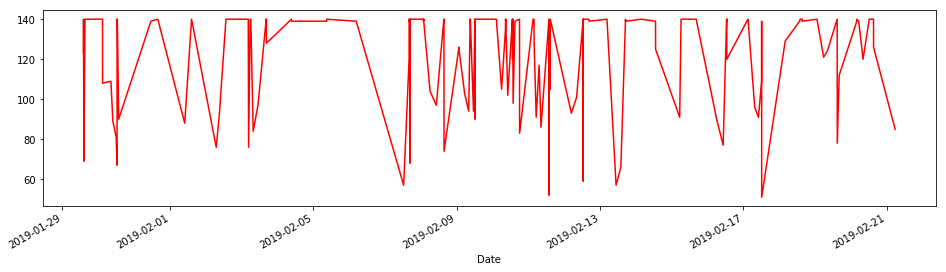

In [28]:
#lenghts along time:
tlen.plot(figsize=(16,4), color='r')


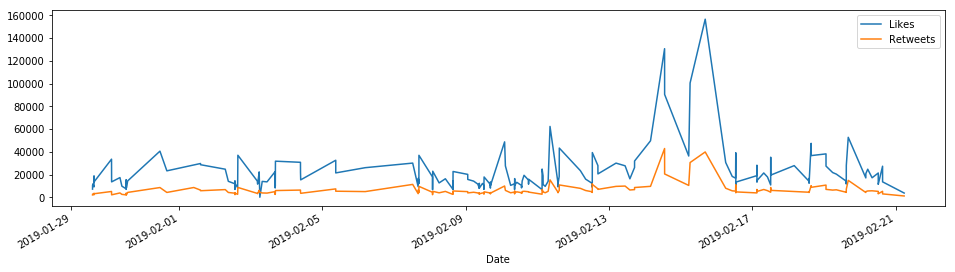

In [32]:
#likes vs retweets visualisation:

tfav.plot(figsize=(16,4), label='Likes',legend=True)
tret.plot(figsize=(16,4), label='Retweets', legend=True);


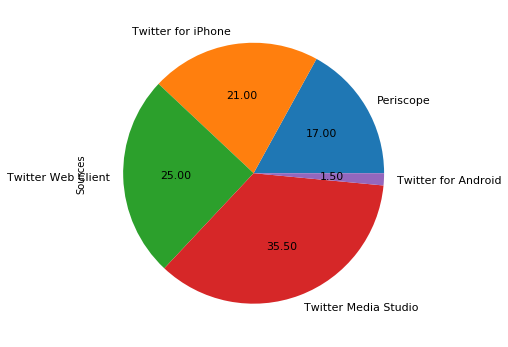

In [34]:
#we create a numpy vector mapped to labels:
percent = np.zeros(len(sources))
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
percent /= 100

#pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct= '%.2f', figsize=(6,6));
    

In [37]:
#sentiment analysis

from textblob import TextBlob
import re                         #regular expression

def clean_tweet(tweet):
    """
    utility function to clean the text in a tweet by removing
    links and speacial characters using regex.
    """
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    """
    utility function to classify the priority of a tweet
    using textblobs
    """
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [38]:
#create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

#we displaqy the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Addressing Indian and Korean businesspersons i...,85,1098458672278102016,2019-02-21 05:45:30,Periscope,3689,1111,0
1,"Subjects relating to world peace, security, th...",126,1098240352627113984,2019-02-20 15:17:59,Twitter for iPhone,13546,2934,0
2,HRH Mohammed Bin Salman and I discussed aspect...,140,1098240346457362432,2019-02-20 15:17:57,Twitter for iPhone,17927,3600,0
3,Held extensive talks with HRH Mohammed Bin Sal...,140,1098240271265992704,2019-02-20 15:17:39,Twitter for iPhone,27289,5236,0
4,"During our talks, President @moonriver365 and ...",140,1098196600701313024,2019-02-20 12:24:07,Twitter for iPhone,11441,3080,1
5,"As fellow democracies, India and ROK have shar...",140,1098196597530394624,2019-02-20 12:24:07,Twitter for iPhone,11365,3010,0
6,"This evening, I will be leaving for the Republ...",140,1098196593273159680,2019-02-20 12:24:05,Twitter for iPhone,21313,5154,0
7,Addressing the media after talks with HRH Moha...,120,1098134316360511488,2019-02-20 08:16:38,Periscope,17121,5666,0
8,हिन्दी साहित्य के शिखर पुरुष नामवर सिंह जी के ...,139,1098090090251710464,2019-02-20 05:20:53,Twitter Web Client,24652,5513,0
9,Best wishes on Mizoram Statehood Day. \n\nThe ...,140,1098071022857641986,2019-02-20 04:05:07,Twitter for iPhone,20772,5001,1


In [40]:
#we construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [42]:
print("Percent of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percent of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percent of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percent of positive tweets: 39.5%
Percent of neutral tweets: 53.0%
Percent of negative tweets: 7.5%
